In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Import the STRAINS dictionary from config.py
from config import STRAINS


In [5]:
X = np.load('./X_reference.npy') 
y = np.load('./y_reference.npy')

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Initialize the kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the model on the training data
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [11]:
# Predict the labels for the test set
y_pred = knn_classifier.predict(X_test)


Accuracy: 0.31
                   precision    recall  f1-score   support

      C. albicans       0.17      1.00      0.29       613
      C. glabrata       0.65      0.99      0.78       611
     K. aerogenes       0.11      0.17      0.13       600
        E. coli 1       0.09      0.02      0.03       636
        E. coli 2       0.02      0.00      0.01       605
       E. faecium       0.63      0.48      0.55       586
    E. faecalis 1       0.36      0.02      0.05       609
    E. faecalis 2       0.00      0.00      0.00       574
       E. cloacae       0.42      0.03      0.05       584
  K. pneumoniae 1       0.14      0.98      0.25       596
  K. pneumoniae 2       0.62      0.05      0.09       593
     P. mirabilis       1.00      0.00      0.00       578
  P. aeruginosa 1       0.89      0.06      0.11       583
  P. aeruginosa 2       0.99      0.61      0.75       585
           MSSA 1       0.41      0.05      0.09       591
           MSSA 3       0.76      0.55  

C:\Users\Anastasia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anastasia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anastasia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


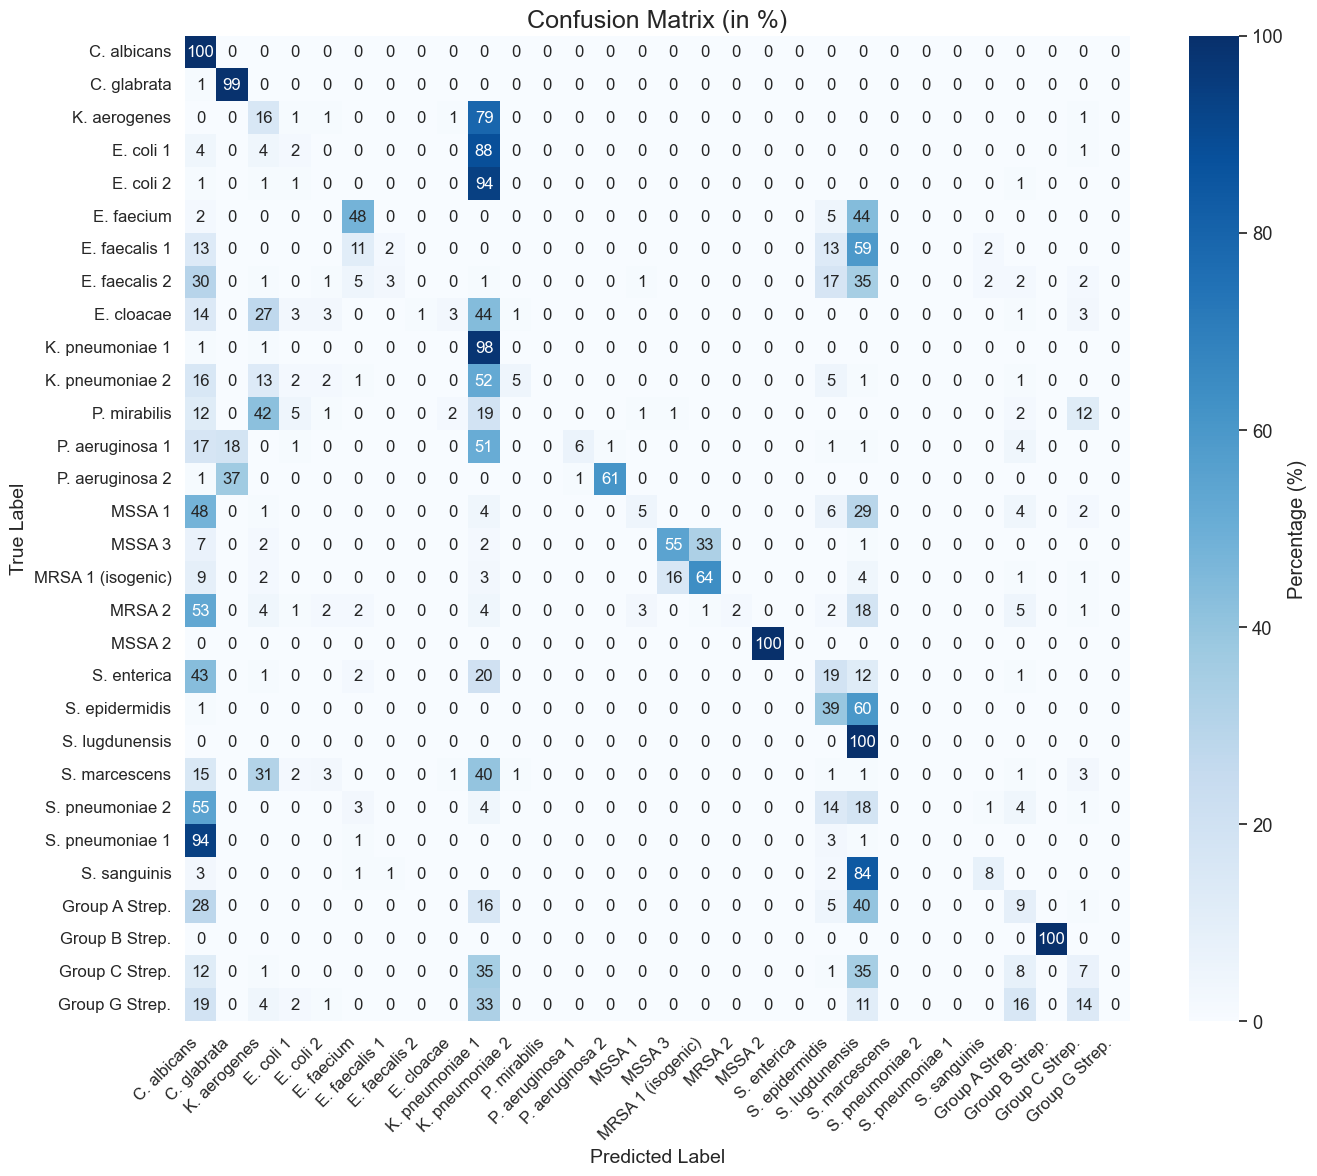

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=[STRAINS[i] for i in range(len(STRAINS))]))

# Convert the confusion matrix to percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Round the percentages to whole numbers for display
conf_matrix_percent = np.round(conf_matrix_percent, 0).astype(int)

# Get the strain names in the correct order
labels = [STRAINS[i] for i in range(len(STRAINS))]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(conf_matrix_percent, annot=True, fmt="d", cmap="Blues", 
                      xticklabels=labels, yticklabels=labels, 
                      annot_kws={"size": 12}, cbar_kws={'label': 'Percentage (%)'})

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix (in %)', fontsize=18)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


Cross-validation accuracy scores: [0.29702381 0.29678571 0.29869048 0.29964286 0.30095238]
Average cross-validation accuracy: 0.30
                   precision    recall  f1-score   support

      C. albicans       0.18      0.99      0.30       613
      C. glabrata       0.64      0.99      0.78       611
     K. aerogenes       0.09      0.12      0.10       600
        E. coli 1       0.08      0.02      0.03       636
        E. coli 2       0.05      0.01      0.01       605
       E. faecium       0.58      0.45      0.51       586
    E. faecalis 1       0.20      0.01      0.03       609
    E. faecalis 2       0.00      0.00      0.00       574
       E. cloacae       0.33      0.02      0.04       584
  K. pneumoniae 1       0.13      0.97      0.24       596
  K. pneumoniae 2       0.52      0.04      0.07       593
     P. mirabilis       1.00      0.00      0.00       578
  P. aeruginosa 1       0.96      0.05      0.09       583
  P. aeruginosa 2       0.99      0.60    

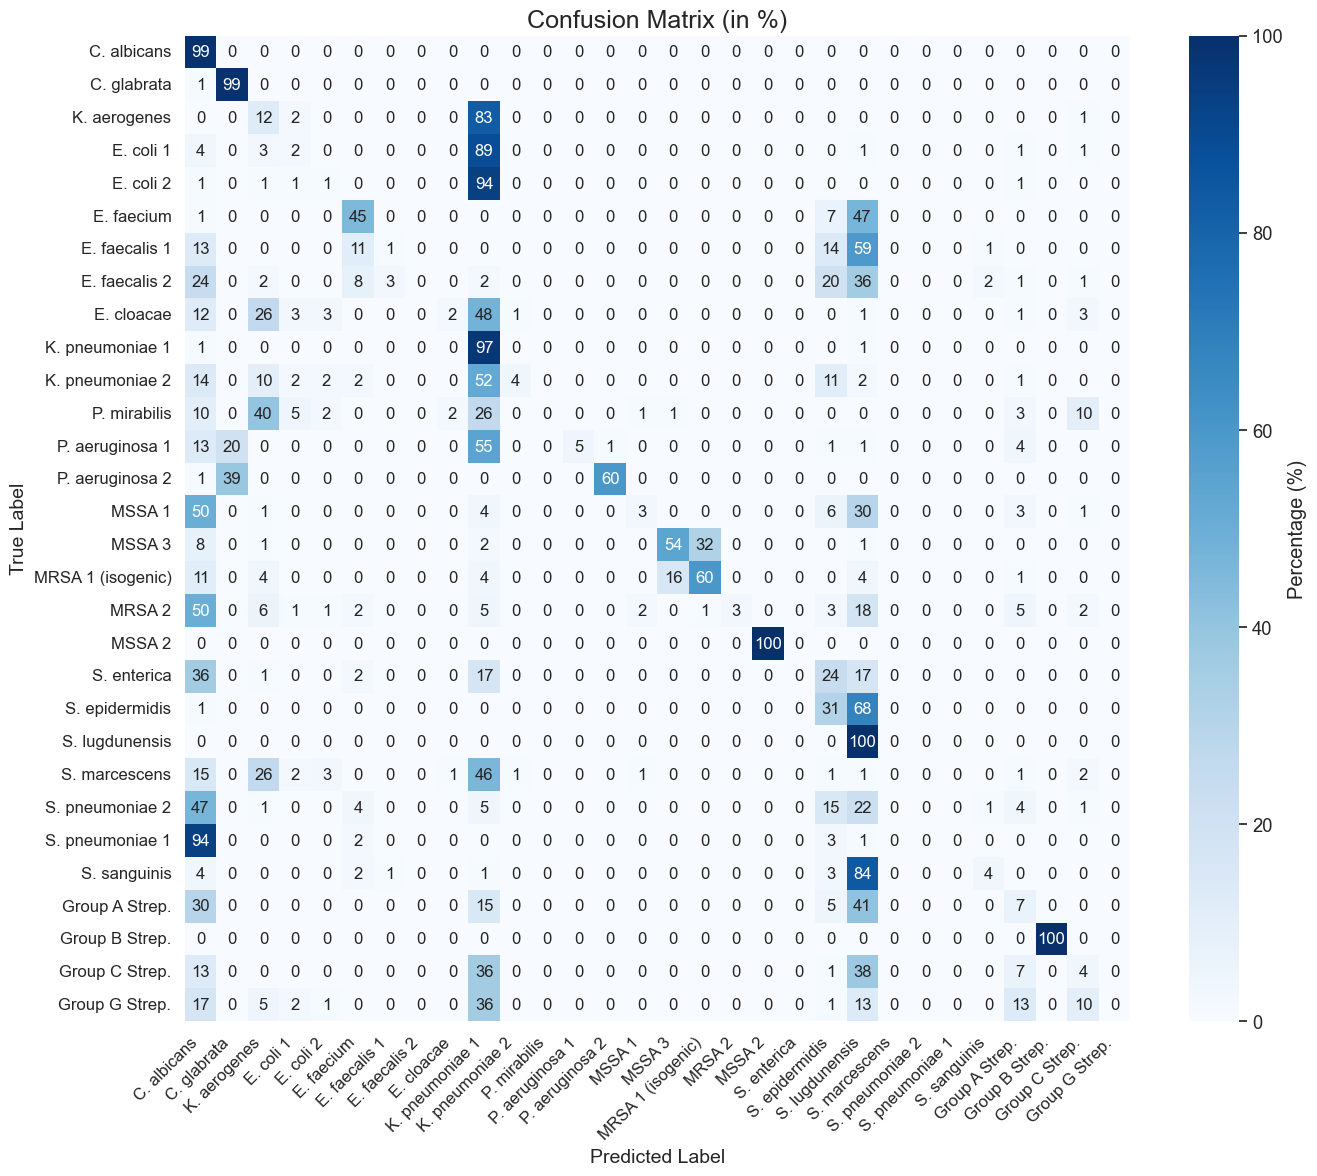

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train_scaled, y_train)

# Cross-validation to check for overfitting
cross_val_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)
print(f'Cross-validation accuracy scores: {cross_val_scores}')
print(f'Average cross-validation accuracy: {np.mean(cross_val_scores):.2f}')

# Predict the labels for the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred, target_names=[STRAINS[i] for i in range(len(STRAINS))], zero_division=1))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
conf_matrix_percent = np.round(conf_matrix_percent, 0).astype(int)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(conf_matrix_percent, annot=True, fmt="d", cmap="Blues", 
                      xticklabels=[STRAINS[i] for i in range(len(STRAINS))], 
                      yticklabels=[STRAINS[i] for i in range(len(STRAINS))],
                      annot_kws={"size": 12}, cbar_kws={'label': 'Percentage (%)'})

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix (in %)', fontsize=18)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)
plt.tight_layout()
plt.show()
